In [ ]:
""" To get the cropped image of a player from the first frame of the video for testing purposes. Put in app.py after trackers are run.

###
# Save cropped image of a player
###

development_and_analysis_dir = cfg.directories.development_and_analysis
cropped_player_name = f"{input_video_path.stem}_cropped_player.jpg"
development_and_analysis_path = Path(get_original_cwd()) / development_and_analysis_dir / "cropped_player" / cropped_player_name

# Create parent directory if it does not exist
parent_dir = development_and_analysis_path.parent
if not parent_dir.exists():
    parent_dir.mkdir(parents=True, exist_ok=True)

# Save cropped image of a player for testing purposes
players = None
if tracking_list is not None:
    players = tracking_list.get("players")
if players is not None and len(players) > 0 and players[0] is not None:
    for track_id, player in players[0].items():
        bbox = player["bbox"]
        frame = video_frames[0]

        # Crop the player bbox from frame
        cropped_player = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]

        # Save the cropped player image
        logger.info(f"Saving cropped player image to: {development_and_analysis_path}")
        cv2.imwrite(str(development_and_analysis_path), cropped_player)

        break  # Save only the first player's crop for testing
else:
    logger.warning("No player tracking data found in tracking_list['players']. Skipping player crop saving.")'

"""

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "cropped_player/man_united_asean_allstars_cropped_player.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

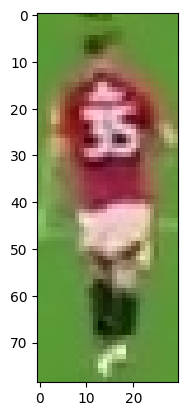

In [4]:
plt.imshow(image)
plt.show()

### Use the jersey. Top half of image.

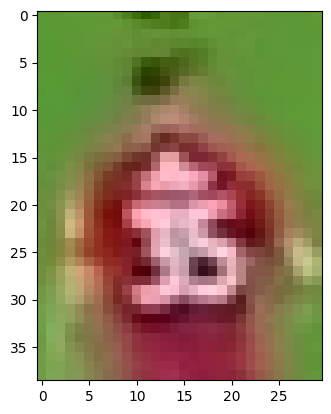

In [5]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

### Get 2 clusters. 1 for jersey. 1 for background (Field)

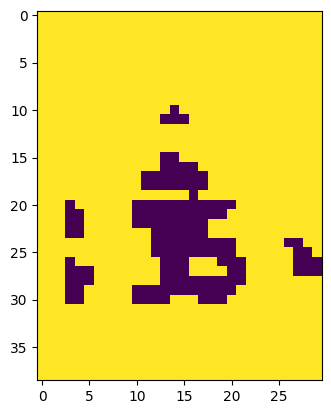

In [ ]:
# Reshape the image (H, W, Color) into 2d array (Pixel, Color). KMeans needs 2d array as input
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters. Group into 2 clusters: 1 for jersey color, 1 for background (Field)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels (0 or 1) for each pixel
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [ ]:
# Since the player is usually in the center of the image, we can assume that the cluster at the corners is the background (Field)
# We need to find the cluster label that is allocated to the team jersey
# Get the cluster labels at the 4 corners of the image
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]

# Get the most common cluster label among the corners. set(corner_clusters) gets all unique values. max() with key=corner_clusters.count gets the most common value
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [8]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [ ]:
# RGB value of the player jersey color
kmeans.cluster_centers_[player_cluster]

array([213.85416667, 160.22222222, 160.4375    ])